Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:04<00:00, 2400132.87it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 475480.12it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3647866.39it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4544496.37it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

number of training samples: 60000
number of testing samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
label of the first taining sample:  5
label of the second taining sample:  0


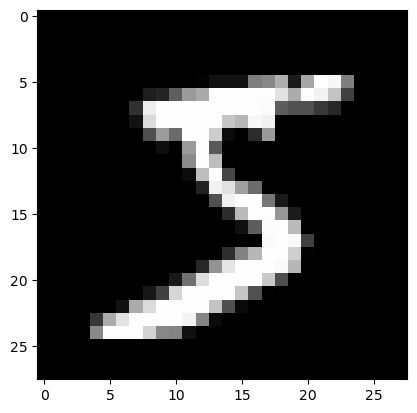

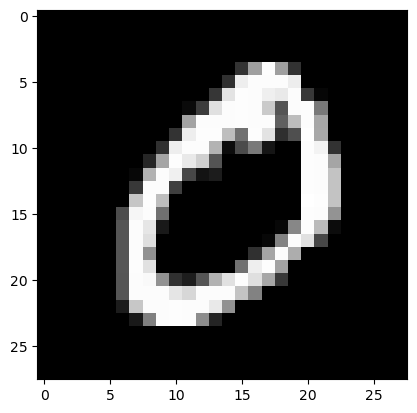

Epoch: 0. Loss: 2.1664044857025146. Accuracy: 62.52
Epoch: 1. Loss: 2.1044063568115234. Accuracy: 75.81
Epoch: 2. Loss: 2.033463478088379. Accuracy: 79.44
Epoch: 3. Loss: 1.9847744703292847. Accuracy: 80.85
Epoch: 4. Loss: 1.946516513824463. Accuracy: 81.7
Epoch: 5. Loss: 1.932436227798462. Accuracy: 82.06
Epoch: 6. Loss: 1.914867639541626. Accuracy: 82.57
Epoch: 7. Loss: 1.8881572484970093. Accuracy: 82.76
Epoch: 8. Loss: 1.8190734386444092. Accuracy: 83.01
Epoch: 9. Loss: 1.834344744682312. Accuracy: 83.28
Epoch: 10. Loss: 1.8112295866012573. Accuracy: 83.47
Epoch: 11. Loss: 1.8555058240890503. Accuracy: 83.6
Epoch: 12. Loss: 1.7811951637268066. Accuracy: 83.72
Epoch: 13. Loss: 1.7726562023162842. Accuracy: 83.94
Epoch: 14. Loss: 1.8089396953582764. Accuracy: 84.08
Epoch: 15. Loss: 1.8122891187667847. Accuracy: 84.24
Epoch: 16. Loss: 1.7821375131607056. Accuracy: 84.37
Epoch: 17. Loss: 1.7639256715774536. Accuracy: 84.4
Epoch: 18. Loss: 1.7562991380691528. Accuracy: 84.59
Epoch: 19. 

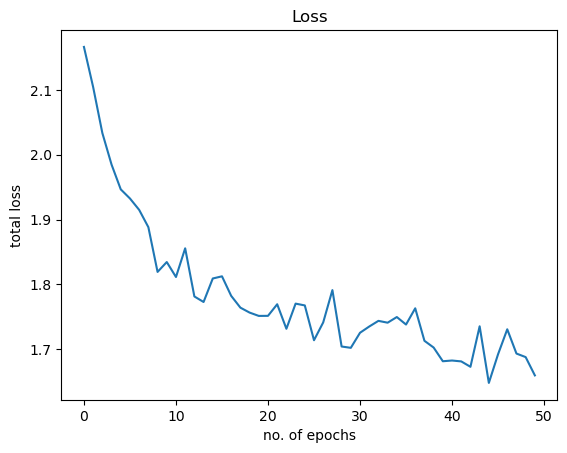

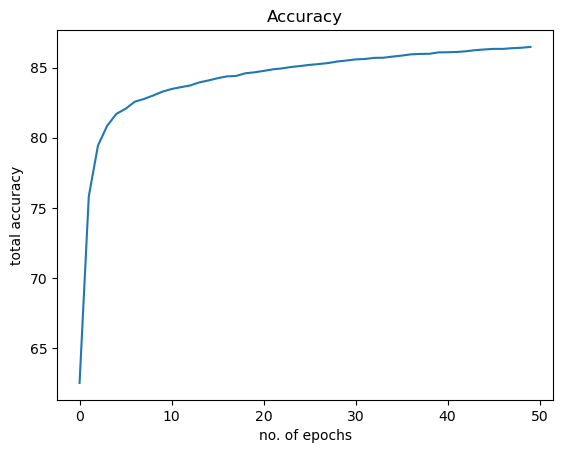

In [16]:
# Model) https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/
# 10 digit image classifier" which maps a 28 x 28 image to labels "0 ~ 9" 
# Test run by Ian H. June 12, 2024

import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())
 
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())
 
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])
 
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()
 
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)
 
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
 
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)
 
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
 
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()
 
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [14]:
!pip install torchvision

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB 812.7 kB/s eta 0:00:02
   ---------------------------------------  1.2/1.2 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 9.4 MB/s eta 0:00:00
